# Kaggle's Heart Disease Classification
- https://www.kaggle.com/competitions/heart-disease-uci/overview
 
 
#### 1. Problem Definition
- Given clinical parameters about a patient, can we predict whether or not they have heart disease?


#### 2. Data 
- Original data is from the Cleveland data and from UCI Machine Learning Repository 
    - https://archive.ics.uci.edu/ml/datasets/heart+disease

- Downloaded in CSV format from Kaggle
https://www.kaggle.com/datasets/redwankarimsony/heart-disease-data
    - includes data dictionary


#### 4. Features - Data Dictionary

1. age - age in years
2. sex - (1 = male; 0 = female)
3. cp - chest pain type
  - 0: Typical angina: chest pain related decrease blood supply to the heart
  - 1: Atypical angina: chest pain not related to heart
  - 2: Non-anginal pain: typically esophageal spasms (non heart related)
  - 3: Asymptomatic: chest pain not showing signs of disease
4. trestbps - resting blood pressure (in mm Hg on admission to the hospital) anything above 130-140 is typically cause for concern
5. chol - serum cholestoral in mg/dl
 - serum = LDL + HDL + .2 * triglycerides
 - above 200 is cause for concern
6. fbs - (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)
'>126' mg/dL signals diabetes
7. restecg - resting electrocardiographic results
    0: Nothing to note
    1: ST-T Wave abnormality
        - can range from mild symptoms to severe problems
        - signals non-normal heart beat
    2: Possible or definite left ventricular hypertrophy
        - Enlarged heart's main pumping chamber
8. thalach - maximum heart rate achieved
9. exang - exercise induced angina (1 = yes; 0 = no)
10. oldpeak - ST depression induced by exercise relative to rest looks at stress of heart during excercise unhealthy heart will stress more
11. slope - the slope of the peak exercise ST segment
    - 0: Upsloping: better heart rate with excercise (uncommon)
    - 1: Flatsloping: minimal change (typical healthy heart)
    - 2: Downslopins: signs of unhealthy heart
12. ca - number of major vessels (0-3) colored by flourosopy
    - colored vessel means the doctor can see the blood passing through
    - the more blood movement the better (no clots)
13. thal - thalium stress result
    - 1,3: normal
    - 6: fixed defect: used to be defect but ok now
    - 7: reversable defect: no proper blood movement when excercising
14. target - have disease or not (1=yes, 0=no) (= the predicted attribute)

### Import Tools

In [1]:
#Import EDA (exploratory data analysis) and plotting libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

  
#Models from Scikit-Lean

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

#Model Evaluation

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import roc_curve


# Exploratory data analysis
- 1. What kinds of data do we have? 
- 2. Is there missing data?
- 3. What are the outliers?
- 4. How can you add, change or remove features to get more out of your data?




### Import data

In [2]:
heart_disease = pd.read_csv("https://raw.githubusercontent.com/mrdbourke/zero-to-mastery-ml/master/data/heart-disease.csv")

### View data types

In [3]:
heart_disease.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


### Check for null values

In [4]:
heart_disease.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

### View Labels distribution

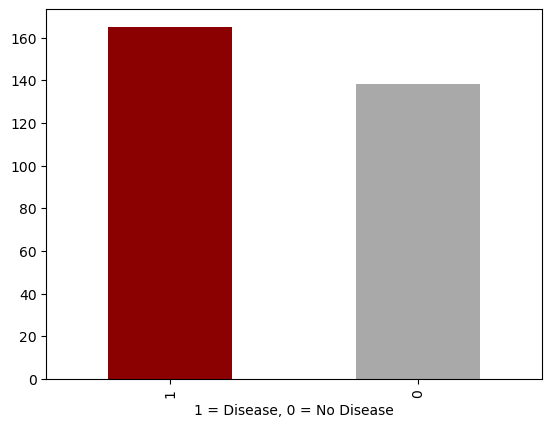

In [5]:
heart_disease["target"].value_counts().plot(kind="bar",
                                           color = ('darkred','darkgrey'),
                                           xlabel = "1 = Disease, 0 = No Disease");



### Observations: 
- Data types are numerical with no null values
- Target classes are relatively balanced

## Finding patterns within Columns 

### Sex to Target comparison

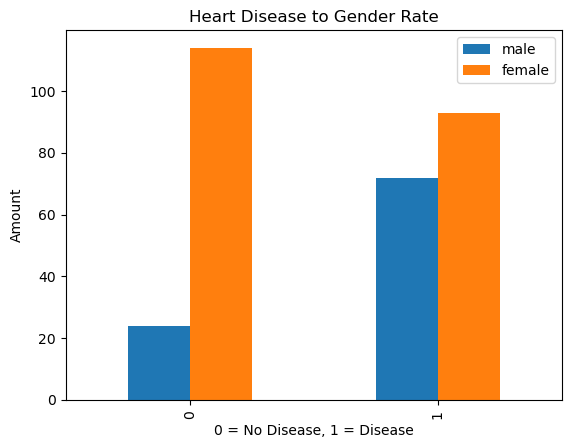

In [6]:
pd.crosstab(heart_disease.target, heart_disease.sex).plot.bar(
title = "Heart Disease to Gender Rate",
xlabel = "0 = No Disease, 1 = Disease",
ylabel = "Amount",
);
plt.legend(("male", "female"));

### Observations:
- Dataset includes a 47% female to male ratio
- Number of females with heart disease cover 1/3 of females without heart disease
- Number of males with heart disease cover over 4/5 of males without heart disease
    

### Age and Max Heart rate to Target comparison

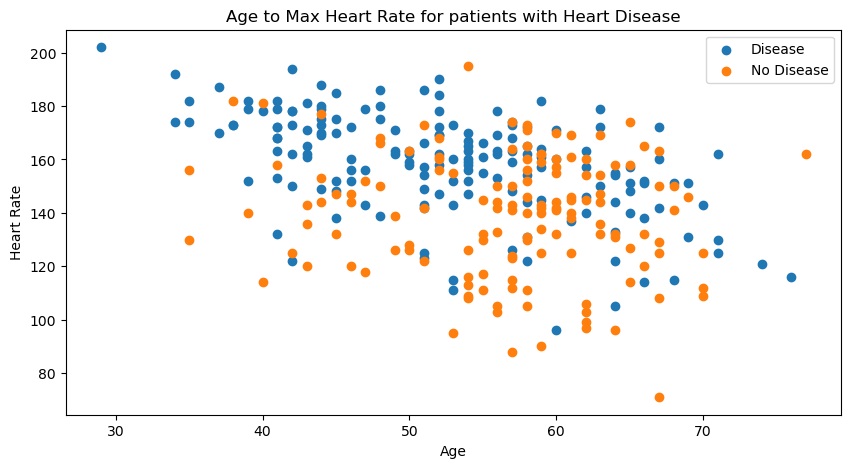

In [7]:
fig, ax0 = plt.subplots(figsize = (10,5))

#scatter age and thalach for patients with heart disease
ax0.scatter(heart_disease.age[heart_disease.target==1],heart_disease.thalach[heart_disease.target==1],     )            

#scatter age and thalach for patients without heart disease
ax0.scatter(heart_disease.age[heart_disease.target==0],heart_disease.thalach[heart_disease.target==0],     )


#customize scatter plot
ax0.set(title= "Age to Max Heart Rate for patients with Heart Disease", 
        xlabel="Age",
        ylabel="Heart Rate" 
       );

ax0.legend(("Disease","No Disease"));

### Observation: 
- Only note here is that younger patients tend to have higher heart rates
            

### Age distribution

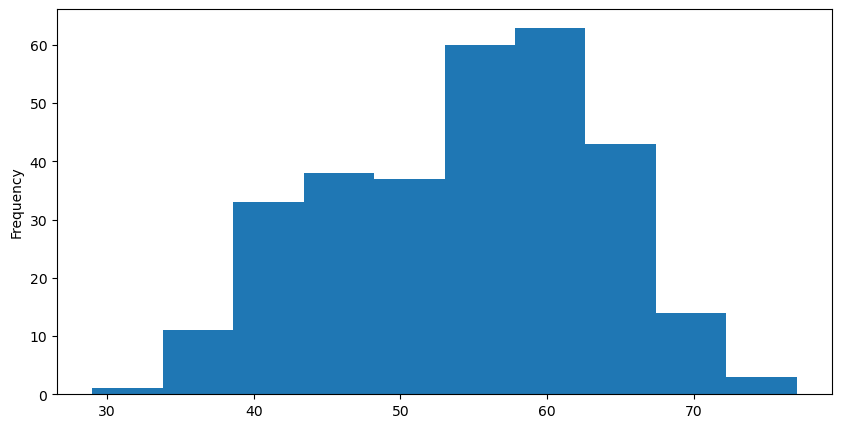

In [8]:
heart_disease["age"].plot.hist(figsize = (10,5));

### Observations: 
- Looks like a normal distribution, bell curve.
    -  No outliers, data doesn't need to be removed
- Majority of the patients are 55-65 years of age



### Does chest pain type correlate with heart disease?

In [9]:
pd.crosstab(heart_disease["cp"], heart_disease["target"])

target,0,1
cp,,
0,104,39
1,9,41
2,18,69
3,7,16


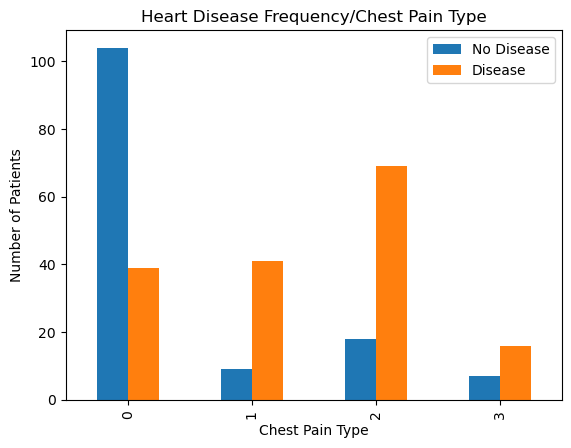

In [10]:
(pd.crosstab(heart_disease["cp"], heart_disease["target"])).plot.bar();

plt.title("Heart Disease Frequency/Chest Pain Type")
plt.xlabel("Chest Pain Type")
plt.ylabel("Number of Patients")
plt.legend(("No Disease", "Disease"));


### Observation: 
- Suprisingly, majority of the patients stuggling with Non-anginal chest pain, pain type 2, not heart related, have heart disease. 

### Correlation Matrix

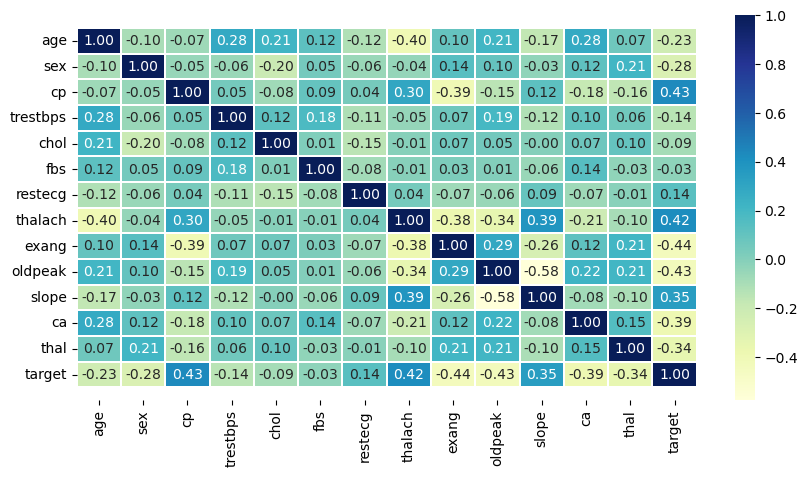

In [11]:
corr_mat=heart_disease.corr()
fig, ax = plt.subplots(figsize=(10,5))
ax = sns.heatmap(corr_mat,
           annot=True,
           linewidths=0.1,
           fmt = ".2f",
        cmap="YlGnBu"
        );
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5);

# Experimenting with Models from Sklearn

Following Sklearn's Choosing right estimator map, models have been narrowed down to 
- K-Nearest Neighbors 
- Random Forest Classifier
- Logistic Regression


### Key note:
- Logistic Regression is not on Sklearn's map.

### Create and Split Datasets

In [12]:
X = heart_disease.drop("target", axis = 1)
y = heart_disease["target"]

X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    test_size=0.20)

### Import Models

In [13]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

### Functionize Fitting and Evaluating Models
   - Create a function  that fits and evaluates given models on given datasets and returns scores in a dictionary format

In [14]:
models = {
    "Logistic_Regression": LogisticRegression(),
    "KNeighbors_Classifier": KNeighborsClassifier(),
    "RandomForest_Classifier": RandomForestClassifier()
}

In [15]:
def model_fit_and_score(models, X_train, y_train, X_test, y_test):
    
    
    '''
        Fits given Machine Learning models and returns evaluations.
        
        models: a dict containing sklearn ML models
        X_train: training features
        y_train: training labels
        X_test: testing features
        y_test: testing labels
        
    '''
    
    #Set empty dictionary to store model's scores
    model_scores = {}
    
    #Loops through the models 
    for name, model in models.items():
        
        #Fit the model to the training data
        model.fit(X_train,y_train)
        
        #Evaluate the model on testing data and append score to model scores
        model_scores[name] = round(model.score(X_test, y_test)*100, 2)
        
     
    return model_scores


In [16]:
model_scores_baseline = model_fit_and_score(models, X_train, y_train, X_test, y_test)

model_scores_baseline

/Users/suranjitmohajan/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


{'Logistic_Regression': 88.52,
 'KNeighbors_Classifier': 73.77,
 'RandomForest_Classifier': 88.52}

### Dataframe for Model results

In [17]:
model_comparison_results = pd.DataFrame(model_scores_baseline,
                                   index = ["Accuracy" ]
                               ).T

### Visualize Model Results 

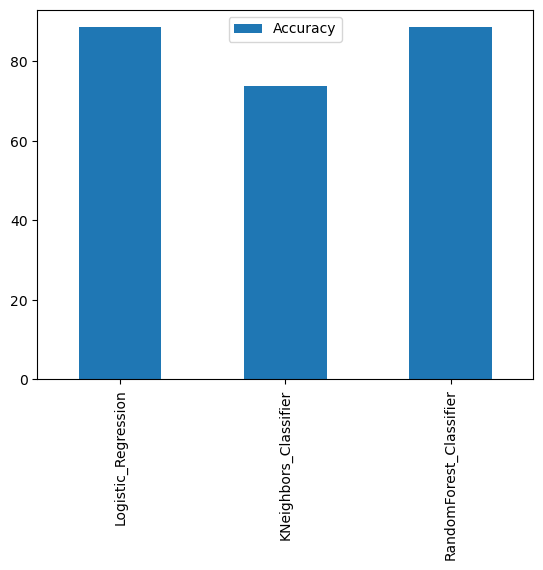

In [18]:
model_comparison_results.plot.bar();

### Observation: 
 - Logistic Regression has yielded the highest accuracy.
 
### Key Note:
- We can try hyperparameter tuning each model using Random Search to improve their performance. 
    

## Hyperparameter Tuning KNN using Random Search 

In [19]:
model = KNeighborsClassifier()

model_scores_train = []
model_scores_test = []

for i in range(1,21):
    model.set_params(n_neighbors = i)
    model.fit(X_train, y_train)
    train_score = model.score(X_train, y_train)
    model_scores_train.append(train_score)
    test_score = model.score(X_test, y_test)
    model_scores_test.append(test_score)

In [20]:
model_scores = pd.DataFrame([model_scores_train, model_scores_test],
                           index=["train", "test"],
                           columns=list(range(1,21))).T

KNN Model's best score on test data was 81.97%


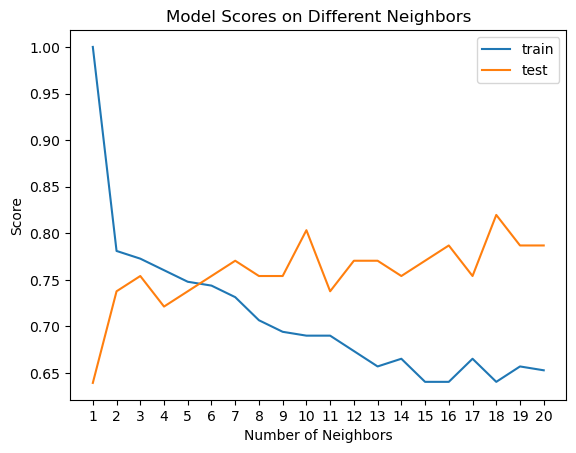

In [21]:
(model_scores).plot();
plt.title("Model Scores on Different Neighbors")
plt.xlabel("Number of Neighbors")
plt.ylabel("Score")
plt.xticks(range(1,21));

print(f"KNN Model's best score on test data was {max(model_scores_test)*100:.2f}%" )


In [22]:
grid_knn= {
    "n_neighbors":[1,2,4,8,10,11,13,15],
    "weights":['uniform'],
    "algorithm":['auto'],
    "leaf_size":[30],
    "p":[2],
    "metric":['minkowski'],
}

In [23]:
clf = KNeighborsClassifier(n_jobs=1)
rs_knn = RandomizedSearchCV(estimator=clf,
                           param_distributions=grid_knn,
                           n_iter=10,
                           cv=5,
                           verbose=0)
rs_knn.fit(X_train, y_train)

/Users/suranjitmohajan/anaconda3/lib/python3.10/site-packages/sklearn/model_selection/_search.py:305: UserWarning: The total space of parameters 8 is smaller than n_iter=10. Running 8 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


RandomizedSearchCV(cv=5, estimator=KNeighborsClassifier(n_jobs=1),
                   param_distributions={'algorithm': ['auto'],
                                        'leaf_size': [30],
                                        'metric': ['minkowski'],
                                        'n_neighbors': [1, 2, 4, 8, 10, 11, 13,
                                                        15],
                                        'p': [2], 'weights': ['uniform']})

In [24]:
rs_knn.best_params_

{'weights': 'uniform',
 'p': 2,
 'n_neighbors': 8,
 'metric': 'minkowski',
 'leaf_size': 30,
 'algorithm': 'auto'}

In [25]:
rs_knn_score = round(rs_knn.score(X_test, y_test)*100,2)

In [26]:
print(f'Hyperparameter tuned KNN model accuracy : {rs_knn_score}% \n')
print(f'Baseline KNN model accuracy: {model_scores_baseline["KNeighbors_Classifier"]}%')

Hyperparameter tuned KNN model accuracy : 75.41% 

Baseline KNN model accuracy: 73.77%


## Hyperparameter Tuning Logistics Regressor using Random Search 

In [27]:
 grid_log_reg = {
    "C": np.logspace(-4, 4, 20),
    "solver": ["liblinear"]
}

In [28]:
rs_log_reg = RandomizedSearchCV(

estimator=LogisticRegression(),
param_distributions=grid_log_reg,
n_iter=20,
n_jobs=1,
cv=5,
verbose=False
    
)

In [29]:
rs_log_reg.fit(X_train,y_train)

RandomizedSearchCV(cv=5, estimator=LogisticRegression(), n_iter=20, n_jobs=1,
                   param_distributions={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                                        'solver': ['liblinear']},
                   verbose=False)

In [30]:
rs_log_reg.best_params_

{'solver': 'liblinear', 'C': 0.08858667904100823}

In [31]:

rs_log_reg_score = round(rs_log_reg.score(X_test, y_test)*100,2) 

In [32]:
print(f'Hyperparameter tuned Logistic Regression model accuracy: {round(rs_log_reg.score(X_test, y_test)*100,2)}% \n')
print(f'Baseline Logistic Regression model accuracy: {model_scores_baseline["Logistic_Regression"]}%')

Hyperparameter tuned Logistic Regression model accuracy: 88.52% 

Baseline Logistic Regression model accuracy: 88.52%


## Hyperparameter Tuning Random Forest Classifier using Random Search 

In [33]:
grid_rf_clf = {
        "n_estimators": np.arange(0,1000, 50),
           "max_depth": [1, 3, 5, 10, 15, None],
           "min_samples_split": np.arange(2,10, 2),
           "min_samples_leaf":  np.arange(1,10, 1)
}

In [34]:
rs_rf_clf = RandomizedSearchCV(

estimator=RandomForestClassifier(),
param_distributions=grid_rf_clf,
n_iter=20,
n_jobs=1,
cv=5,
verbose=False
    
)

rs_rf_clf.fit(X_train, y_train)

/Users/suranjitmohajan/anaconda3/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
5 fits failed out of a total of 100.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
5 fits failed with the following error:
Traceback (most recent call last):
  File "/Users/suranjitmohajan/anaconda3/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/suranjitmohajan/anaconda3/lib/python3.10/site-packages/sklearn/ensemble/_forest.py", line 340, in fit
    self._validate_params()
  File "/Users/suranjitmohajan/anaconda3/lib/python3.10/site-packages/sklearn/base.py", line 581, in _validate_params
    valida

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=20,
                   n_jobs=1,
                   param_distributions={'max_depth': [1, 3, 5, 10, 15, None],
                                        'min_samples_leaf': array([1, 2, 3, 4, 5, 6, 7, 8, 9]),
                                        'min_samples_split': array([2, 4, 6, 8]),
                                        'n_estimators': array([  0,  50, 100, 150, 200, 250, 300, 350, 400, 450, 500, 550, 600,
       650, 700, 750, 800, 850, 900, 950])},
                   verbose=False)

In [35]:
rs_rf_clf.best_params_

{'n_estimators': 650,
 'min_samples_split': 6,
 'min_samples_leaf': 6,
 'max_depth': 5}

In [36]:
rs_rf_clf_score = round(rs_rf_clf.score(X_test,y_test)*100,2)

In [37]:
print(f'Hyperparameter tuned RandomForest Classifier accuracy: {rs_rf_clf_score}% \n')
print(f'Baseline RandomForest_Classifier accuracy: {model_scores_baseline["RandomForest_Classifier"]}%')



Hyperparameter tuned RandomForest Classifier accuracy: 88.52% 

Baseline RandomForest_Classifier accuracy: 88.52%


In [38]:
 
scores = pd.DataFrame(model_scores_baseline,
             index=["Baseline Accuracy"]).T

scores["Random Search Accuracy"] = [rs_log_reg_score, rs_knn_score, rs_rf_clf_score]
scores

,Baseline Accuracy,Random Search Accuracy
Logistic_Regression,88.52,88.52
KNeighbors_Classifier,73.77,75.41
RandomForest_Classifier,88.52,88.52


### Observation: 
- Tuning 6 hyperparameters has beat the baseline for KNeighbors Classifier.

- Tuning 4 hyperparameters has matched the baseline for Random Forest Classifier. 

- Tuning 2 hyperparameters has matched the baseline for Logistic Regression.

### Key Note: 
- Since fine tuning only two hyperparameters for Logistic_Regression has matched the baseline, we can try finetuning  further using GridSearchCV to test all parameter value possibilities. 


## Hyperparameter Tuning Logistics Regressor using Grid Search 

In [65]:
grid_log_reg = {
    "C": np.logspace(-4, 4, 50), #length of "C" values changed to 50 
    "solver": ["liblinear"],
    
}

gs_log_reg = GridSearchCV(estimator=LogisticRegression(),
                          param_grid=grid_log_reg,
                          cv = 5,
                          n_jobs=11
                        
)

In [66]:
gs_log_reg.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=LogisticRegression(), n_jobs=11,
             param_grid={'C': array([1.00000000e-04, 1.45634848e-04, 2.12095089e-04, 3.08884360e-04,
       4.49843267e-04, 6.55128557e-04, 9.54095476e-04, 1.38949549e-03,
       2.02358965e-03, 2.94705170e-03, 4.29193426e-03, 6.25055193e-03,
       9.10298178e-03, 1.32571137e-02, 1.93069773e-02, 2.81176870e-02,
       4.09491506e-02, 5.96362332e-0...
       3.72759372e+00, 5.42867544e+00, 7.90604321e+00, 1.15139540e+01,
       1.67683294e+01, 2.44205309e+01, 3.55648031e+01, 5.17947468e+01,
       7.54312006e+01, 1.09854114e+02, 1.59985872e+02, 2.32995181e+02,
       3.39322177e+02, 4.94171336e+02, 7.19685673e+02, 1.04811313e+03,
       1.52641797e+03, 2.22299648e+03, 3.23745754e+03, 4.71486636e+03,
       6.86648845e+03, 1.00000000e+04]),
                         'solver': ['liblinear']})

In [67]:
gs_log_reg.best_params_

{'C': 0.12648552168552957, 'solver': 'liblinear'}

In [68]:
gs_log_reg.score(X_test, y_test)

0.8852459016393442

### Observation:
- Despite finetuning the hyperparameters of the Logistic Regression model using GridSearchCV, its still unable to outperform its baseline score. 

# Model Evaluations



Model evaluations using metrics
- ROC curve and AUC score (True positive / False Positive)
- Confusion matrix
- Classification RPT
- Precision
- Recall
- F1-score

Use CV where possible


### Make Predictions using Logistic Regression 

In [69]:
y_preds = gs_log_reg.predict(X_test)

### Plot a roc cuve and display AUC Score

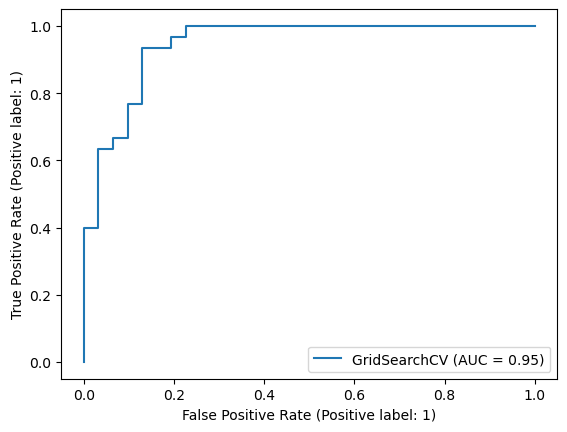

In [70]:
from sklearn.metrics import RocCurveDisplay
RocCurveDisplay.from_estimator(gs_log_reg, X_test, y_test); 

### Functionize Confusion Matrix

- Create a function that plots a confusion matrix with given parameters true labels and predicted labels


In [71]:
def plot_conf_mat(y_true,y_preds):
    
    '''
        Plots a confusion matrix using Seaborn
    '''
    fig, ax = plt.subplots(figsize = (5,4))

    ax = sns.heatmap(confusion_matrix(y_true, y_preds),
                    annot=True #shows the counts 
                    );

    ax.set(
        xlabel = "True label", #sets true labels on X axis
        ylabel="Predicted label" #sets predictions on y axis
    );

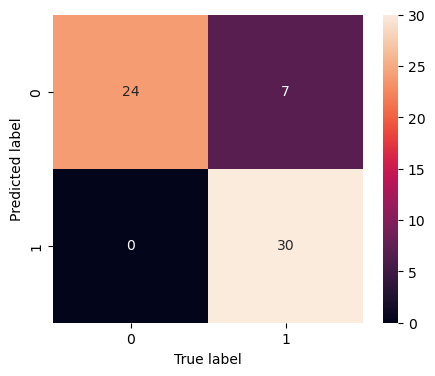

In [72]:
plot_conf_mat(y_test,y_preds)

### Create a Classification Report

In [83]:
class_rpt = classification_report(y_test, y_preds)
print(class_rpt)

              precision    recall  f1-score   support

           0       1.00      0.77      0.87        31
           1       0.81      1.00      0.90        30

    accuracy                           0.89        61
   macro avg       0.91      0.89      0.88        61
weighted avg       0.91      0.89      0.88        61



### Evaluation metrics calculated through Cross-Validation
- use best parameters from grid search

     - accuracy
     - precision
     - recall
     - f1 score


### Grid Search best parameters

In [84]:
gs_log_reg.best_params_

{'C': 0.12648552168552957, 'solver': 'liblinear'}

### Create new classifier with best parameters

In [85]:
clf = LogisticRegression(C = 0.12648552168552957,
                        solver = "liblinear")

### Cross Validated Accuracy

In [86]:
cv_accuracy = np.mean(cross_val_score(clf,
               X,
               y,
               cv = 5,
               scoring = "accuracy"))

### Cross Validated Precision

In [87]:
cv_precision = np.mean(cross_val_score(clf,
               X,
               y,
               cv = 5,
               scoring = "precision"))

### Cross Validated Recall

In [88]:
cv_recall = np.mean(cross_val_score(clf,
               X,
               y,
               cv = 5,
               scoring = "recall"))

### Cross Validated F1

In [89]:
cv_f1 = np.mean(cross_val_score(clf,
               X,
               y,
               cv = 5,
               scoring = "f1"))

### Visualize cross-validated metrics


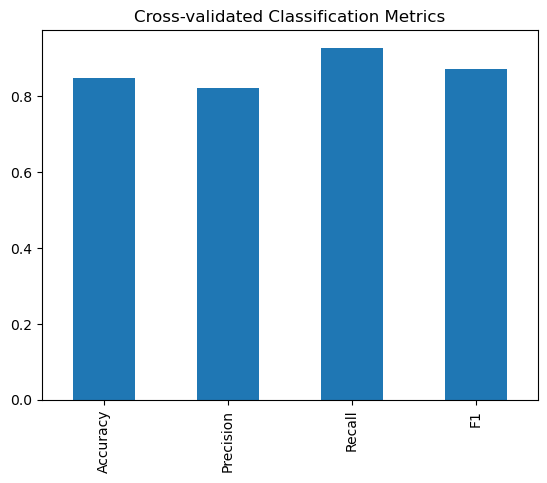

In [90]:
# Visualize cross-validated metrics
cv_metrics = pd.DataFrame((cv_accuracy,
                           cv_precision,
                           cv_recall, 
                           cv_f1),
                          index=["Accuracy",
                                 "Precision",
                                 "Recall",
                                 "F1"])

cv_metrics.plot.bar(title = "Cross-validated Classification Metrics",
                   legend = False);



## Feature Importance 

- Which features contributed the most to the model outcomes?
- How did they contribute? Positive / Negative?

In [91]:
clf = LogisticRegression(C=0.12648552168552957,
                         solver="liblinear")

clf.fit(X_train, y_train);

### Few Observations: 
   - When the value for Sex increases, chances of being a male, the chances of having heart disease decreases.
   - When the value of slope increases, gets closer to Downslopins, signs of an unhealthy heart, the chance of having heart disease increases. 
   - The higher the ca, more blood movement (no clots), the less likely patient is expected to have heart disease. 